In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from numpy import trapz
plt.style.use('seaborn-darkgrid')

# Download Data Part 1

In [2]:
col_names = ['time','sw_up','sw_down','lw_up','lw_down','body_temp_C','body_temp_K','tc_lw_up','tc_lw_down','net','sky_temp','g_temp']
cols=[0,2,3,4,5,6,7,8,9,10,11,12]
solar = pd.read_csv('deere_CR3000_CNR1.csv',header=3,names=col_names,usecols=cols,parse_dates=['time'])

start_date = pd.Timestamp(2020,3,13,11,42,0)
end_date = pd.Timestamp(2020,3,13,11,56,30)
mask1 = (solar['time'] > start_date) & (solar['time'] <= end_date)
solar = solar.loc[mask1]
solar.head()

,time,sw_up,sw_down,lw_up,lw_down,body_temp_C,body_temp_K,tc_lw_up,tc_lw_down,net,sky_temp,g_temp
106,2020-03-13 11:42:10,2.480,0.485,8.83,3.180,21.75,294.9,437.6,432.0,7.644,23.25,22.29
107,2020-03-13 11:42:20,2.480,0.636,8.76,3.417,21.74,294.9,437.6,432.2,7.191,23.24,22.33
108,2020-03-13 11:42:30,2.717,0.809,8.87,3.320,21.75,294.9,437.7,432.2,7.460,23.27,22.32
109,2020-03-13 11:42:40,4.172,0.744,8.50,3.126,21.75,294.9,437.3,432.0,8.800,23.20,22.29
110,2020-03-13 11:42:50,3.364,0.679,8.88,2.911,21.76,294.9,437.7,431.8,8.660,23.27,22.26


#### Plot downwelling and upwelling sw radiation

Text(0.5,1,'Shortwave Radiation')

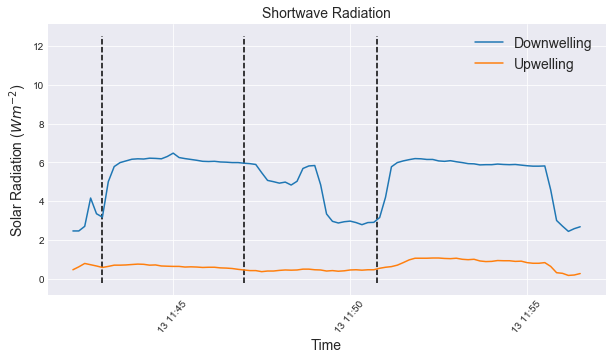

In [3]:
plt.figure(figsize=(10,5))
plt.plot(solar['time'],solar['sw_up'])
plt.plot(solar['time'],solar['sw_down'])

speed_times=[pd.Timestamp(2020,3,13,11,43,0),pd.Timestamp(2020,3,13,11,47,0),
             pd.Timestamp(2020,3,13,11,50,45)]

plt.vlines(speed_times,-0.2,12.5,linestyle = '--')
plt.legend(['Downwelling','Upwelling'],fontsize=14)
plt.xticks(rotation=50)
plt.grid(True)
plt.ylabel('Solar Radiation ($W m^{-2}$)',fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.title('Shortwave Radiation',fontsize=14)

Text(0.5,1,'Albedo over time')

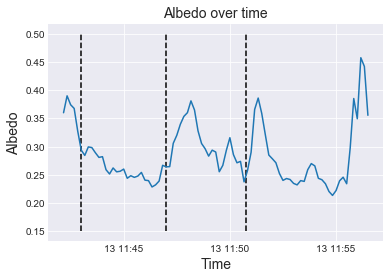

In [4]:
solar['albedo']=solar['lw_down']/solar['lw_up']
plt.plot(solar['time'],solar['albedo'])
plt.vlines(speed_times,0.15,0.5,linestyle = '--')
plt.ylabel('Albedo',fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.title('Albedo over time',fontsize=14)

In [6]:
start_date = pd.Timestamp(2020,3,13,11,43,0)
end_date = pd.Timestamp(2020,3,13,11,46,30)
mask1 = (solar['time'] > start_date) & (solar['time'] <= end_date)
bare_desk = solar.loc[mask1]
print("BARE DESK ALBEDO = ",round(bare_desk['albedo'].mean(),2))

start_date = pd.Timestamp(2020,3,13,11,51,0)
end_date = pd.Timestamp(2020,3,13,11,54,0)
mask2 = (solar['time'] > start_date) & (solar['time'] <= end_date)
snow_ground = solar.loc[mask2]
print("WHITE PAPER ALBEDO = ",round(snow_ground['albedo'].mean(),2))

BARE DESK ALBEDO =  0.26
WHITE PAPER ALBEDO =  0.28
